In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1=pd.read_csv('Rose.csv')

In [3]:
df1=pd.read_csv('Rose.csv',parse_dates=['YearMonth'])

In [4]:
df1.head()

,YearMonth,Rose
0,1980-01-01,112.0
1,1980-02-01,118.0
2,1980-03-01,129.0
3,1980-04-01,99.0
4,1980-05-01,116.0


In [5]:
df1=pd.read_csv('Rose.csv',parse_dates=['YearMonth'],index_col='YearMonth')

In [6]:
df1.head()

,Rose
YearMonth,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0


In [7]:
df1.shape

(187, 1)

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    185 non-null    float64
dtypes: float64(1)
memory usage: 2.9 KB


In [9]:
df1.duplicated().sum()

90

C:\Users\John\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rose'>

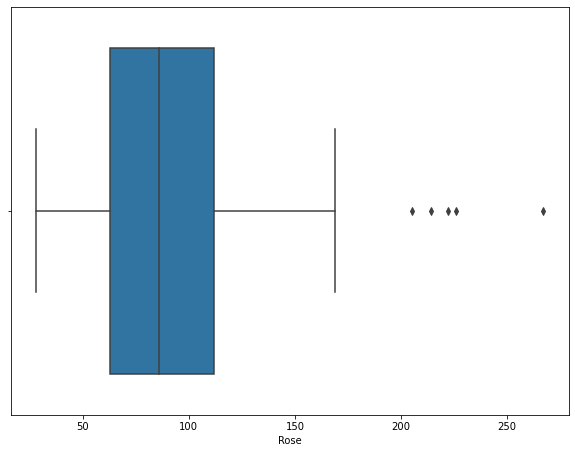

In [10]:
plt.figure(figsize=(10,7.5))
sns.boxplot(df1['Rose'])

In [11]:
df1['Rose'].unique()

array([112., 118., 129.,  99., 116., 168., 205., 147., 150., 267., 126.,
       124.,  97., 102., 127., 222., 214., 141., 154., 226.,  89.,  77.,
        82., 121., 117., 106., 134., 169.,  75., 108., 115.,  85., 101.,
       109., 105.,  95., 135., 164.,  88.,  87.,  91., 142., 139., 159.,
        61.,  93., 103.,  90., 123.,  57.,  65.,  67.,  71.,  76., 110.,
       107.,  58.,  70.,  86.,  74.,  73., 100.,  96., 157.,  63.,  66.,
        83.,  79.,  60., 137.,  43.,  69.,  78., 132.,  54.,  55.,  34.,
        47.,  56.,  53.,  52.,  46.,  51.,  33.,  40.,  45.,  41.,  48.,
        30.,  35.,  42.,  44.,  nan,  84.,  39.,  28.,  62.])

In [12]:
df1.describe()

,Rose
count,185.000000
mean,90.394595
std,39.175344
min,28.000000
25%,63.000000
50%,86.000000
75%,112.000000
max,267.000000


C:\Users\John\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Rose', ylabel='Density'>

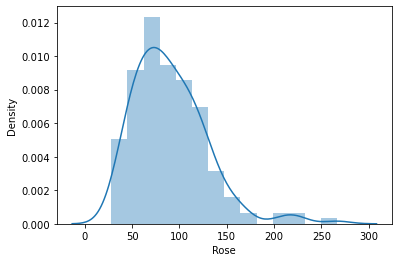

In [13]:
sns.distplot(df1['Rose'])

In [14]:
df1.skew()

Rose    1.266468
dtype: float64

In [15]:
df1.kurtosis()

Rose    2.832293
dtype: float64

In [16]:
df1['Rose'].isnull().sum()

2

In [17]:
df1['Rose'].median()

86.0

In [18]:
df1['Rose']=df1['Rose'].replace(np.nan,86.0)

In [19]:
df1['Rose'].isnull().sum()

0

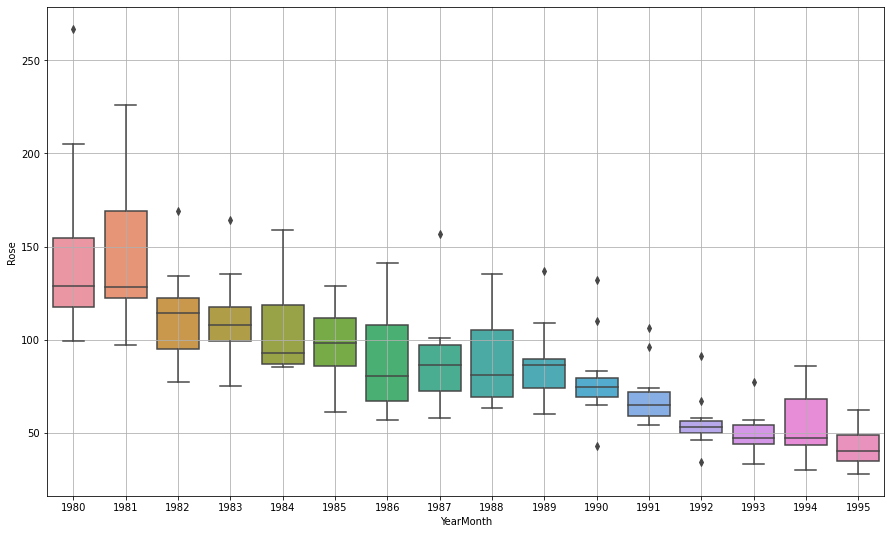

In [20]:
plt.figure(figsize=(15,9))
sns.boxplot(x = df1.index.year,y = df1['Rose'])
plt.grid();

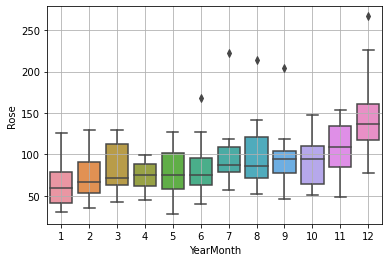

In [21]:

sns.boxplot(x = df1.index.month,y = df1['Rose'])
plt.grid();

<AxesSubplot:xlabel='YearMonth'>

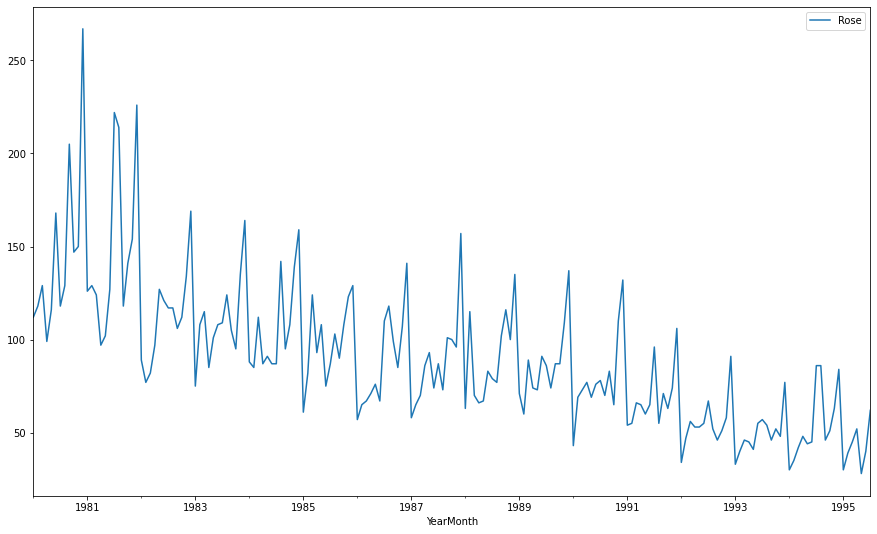

In [22]:
df1.plot(figsize=(15,9))

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [24]:
df1_add_decompose=seasonal_decompose(df1,model='additive')

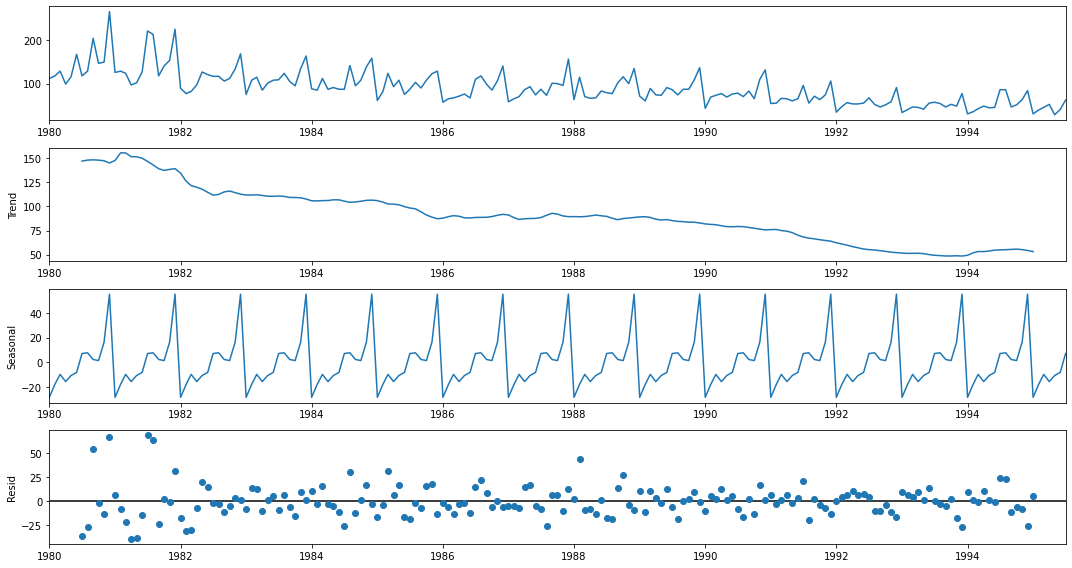

In [25]:
from pylab import rcParams
rcParams['figure.figsize'] = 15,8
df1_add_decompose.plot()
plt.show()

In [26]:
df1_mul_decompose=seasonal_decompose(df1,model='multiplicative')

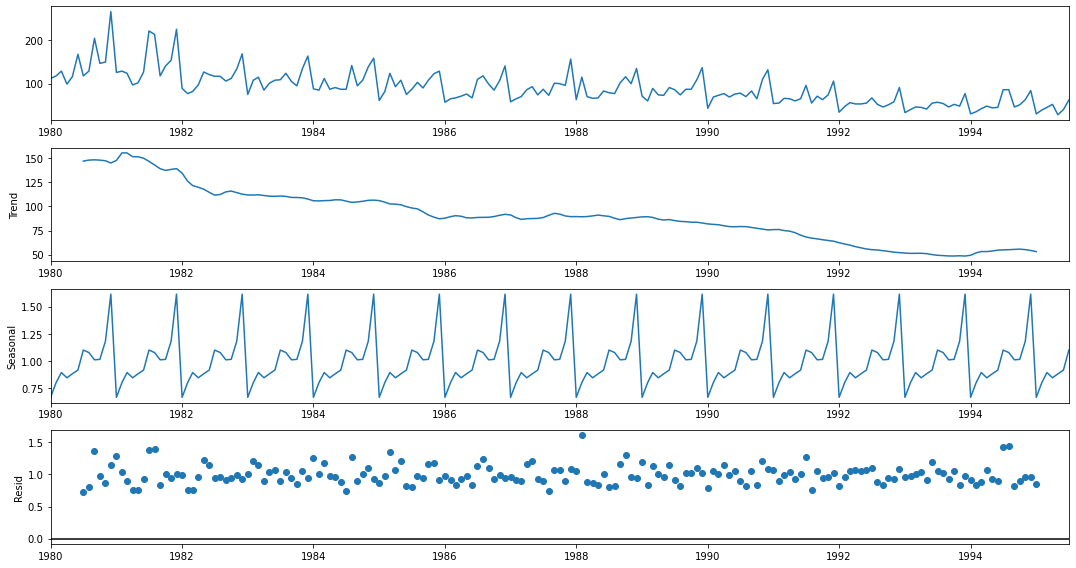

In [27]:
df1_mul_decompose.plot()
plt.show()

In [28]:
df1_add_decompose.trend

YearMonth
1980-01-01   NaN
1980-02-01   NaN
1980-03-01   NaN
1980-04-01   NaN
1980-05-01   NaN
              ..
1995-03-01   NaN
1995-04-01   NaN
1995-05-01   NaN
1995-06-01   NaN
1995-07-01   NaN
Name: trend, Length: 187, dtype: float64

In [29]:
df1_add_decompose.seasonal

YearMonth
1980-01-01   -28.355258
1980-02-01   -17.794345
1980-03-01    -9.764583
1980-04-01   -15.577083
1980-05-01   -10.675298
                ...    
1995-03-01    -9.764583
1995-04-01   -15.577083
1995-05-01   -10.675298
1995-06-01    -8.157440
1995-07-01     7.161409
Name: seasonal, Length: 187, dtype: float64

In [30]:
df1_add_decompose.resid

YearMonth
1980-01-01   NaN
1980-02-01   NaN
1980-03-01   NaN
1980-04-01   NaN
1980-05-01   NaN
              ..
1995-03-01   NaN
1995-04-01   NaN
1995-05-01   NaN
1995-06-01   NaN
1995-07-01   NaN
Name: resid, Length: 187, dtype: float64

In [31]:
df1_mul_decompose.trend

YearMonth
1980-01-01   NaN
1980-02-01   NaN
1980-03-01   NaN
1980-04-01   NaN
1980-05-01   NaN
              ..
1995-03-01   NaN
1995-04-01   NaN
1995-05-01   NaN
1995-06-01   NaN
1995-07-01   NaN
Name: trend, Length: 187, dtype: float64

In [32]:
df1_mul_decompose.seasonal

YearMonth
1980-01-01    0.664904
1980-02-01    0.801176
1980-03-01    0.893234
1980-04-01    0.844896
1980-05-01    0.881276
                ...   
1995-03-01    0.893234
1995-04-01    0.844896
1995-05-01    0.881276
1995-06-01    0.915970
1995-07-01    1.099977
Name: seasonal, Length: 187, dtype: float64

In [33]:
df1_mul_decompose.resid

YearMonth
1980-01-01   NaN
1980-02-01   NaN
1980-03-01   NaN
1980-04-01   NaN
1980-05-01   NaN
              ..
1995-03-01   NaN
1995-04-01   NaN
1995-05-01   NaN
1995-06-01   NaN
1995-07-01   NaN
Name: resid, Length: 187, dtype: float64

In [34]:
train_df1=df1[df1.index<'1991']
test_df1=df1[df1.index>'1991']

In [35]:
print('Shape of train',train_df1.shape,'\nShape of test',test_df1.shape)

Shape of train (132, 1) 
Shape of test (54, 1)


In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
train_time=[i+1 for i in range(len(train_df1))]
test_time=[i+187 for i in range(len(test_df1))]

In [38]:
LR_1_train=train_df1.copy()
LR_1_test=test_df1.copy()

In [39]:
LR_1_train['time']=train_time
LR_1_test['time']=test_time

In [40]:
lr=LinearRegression()

In [41]:
lr.fit(LR_1_train[['time']],LR_1_train['Rose'])

LinearRegression()

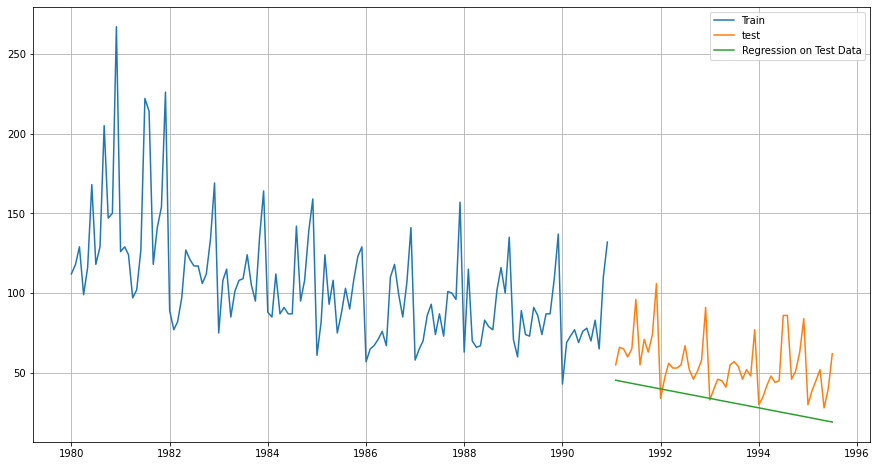

In [42]:
model_train=lr.predict(LR_1_train[['time']])
model_test=lr.predict(LR_1_test[['time']])
LR_1_test['RegOnTime']=model_test
plt.plot(LR_1_train['Rose'],label='Train')
plt.plot(LR_1_test['Rose'],label='test')
plt.plot(LR_1_test['RegOnTime'],label='Regression on Test Data')
plt.legend(loc='best')
plt.grid();

In [43]:
from sklearn import metrics

In [44]:
Rmse_LR=metrics.mean_squared_error(LR_1_test[['Rose']],model_test)
Rmse_LR

798.7594137459643

In [45]:
result1_DF=pd.DataFrame({'RMSE':[Rmse_LR]},index=['Regression'])
result1_DF

,RMSE
Regression,798.759414


In [46]:
Naive_train=train_df1.copy()
Naive_test=test_df1.copy()

In [47]:
Naive_train.tail()

,Rose
YearMonth,
1990-08-01,70.0
1990-09-01,83.0
1990-10-01,65.0
1990-11-01,110.0
1990-12-01,132.0


In [48]:
Naive_train[Naive_train.index=='1990-12-01']

,Rose
YearMonth,
1990-12-01,132.0


In [49]:
Naive_test['Naive']=132

In [50]:
Naive_test.head()

,Rose,Naive
YearMonth,,
1991-02-01,55.0,132
1991-03-01,66.0,132
1991-04-01,65.0,132
1991-05-01,60.0,132
1991-06-01,65.0,132


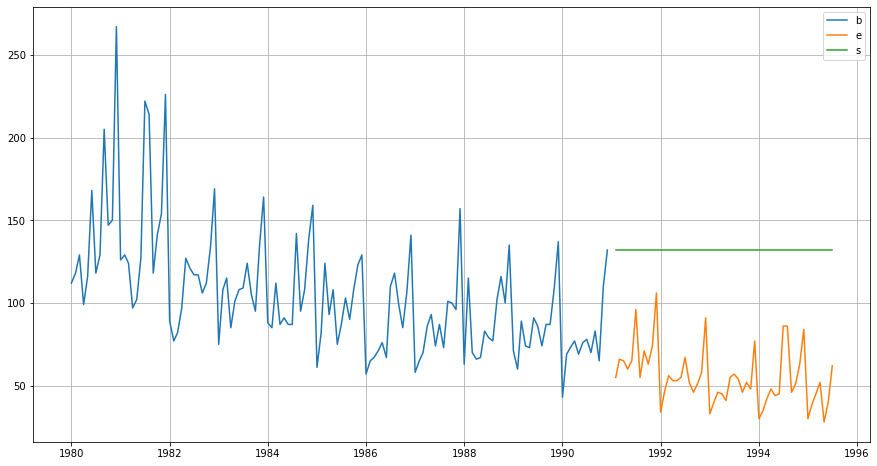

In [51]:
plt.plot(Naive_train['Rose'],label='Train')
plt.plot(Naive_test['Rose'],label='Test')
plt.plot(Naive_test['Naive'],label='Naive')
plt.legend('best')
plt.grid()

In [52]:
Rmse_Na=metrics.mean_squared_error(Naive_test['Rose'],Naive_test['Naive'])
Rmse_Na

6161.351851851852

In [53]:
result1_DF2=pd.DataFrame({'RMSE':[Rmse_Na]},index=['Naive'])
result1_DF2

,RMSE
Naive,6161.351852


In [54]:
result1_DF=pd.concat([result1_DF,result1_DF2])
result1_DF

,RMSE
Regression,798.759414
Naive,6161.351852


In [55]:
SimAvg_train=train_df1.copy()
SimAvg_test=test_df1.copy()

In [56]:
Avg=SimAvg_train['Rose'].mean()
Avg

104.93939393939394

In [57]:
SimAvg_test['Avg']=Avg

In [58]:
SimAvg_train.head()

,Rose
YearMonth,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0


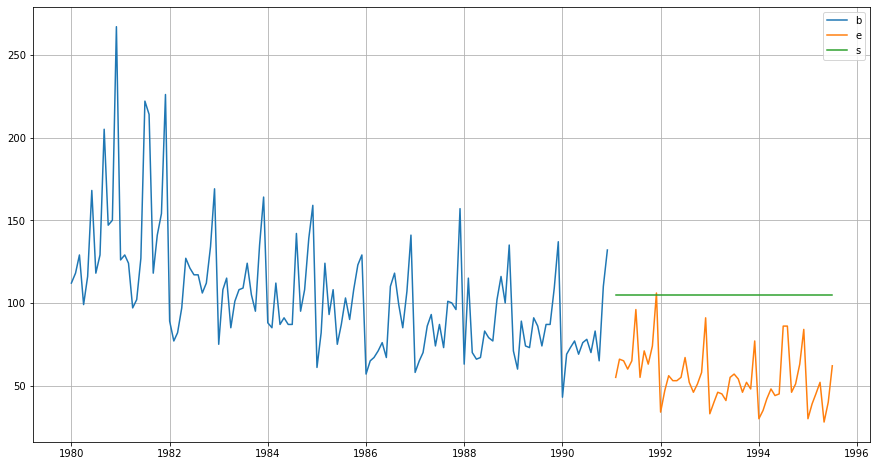

In [59]:
plt.plot(SimAvg_train['Rose'],label='Train')
plt.plot(SimAvg_test['Rose'],label='Test')
plt.plot(SimAvg_test['Avg'],label='Simple Average')
plt.legend('best')
plt.grid();

In [60]:
Rmse_Sim=metrics.mean_squared_error(SimAvg_test['Rose'],SimAvg_test['Avg'])
Rmse_Sim

2745.3375675951434

In [61]:
result1_DF3=pd.DataFrame({'RMSE':[Rmse_Sim]},index=['Avg'])
result1_DF3

,RMSE
Avg,2745.337568


In [62]:
result1_DF=pd.concat([result1_DF,result1_DF3])
result1_DF

,RMSE
Regression,798.759414
Naive,6161.351852
Avg,2745.337568


In [63]:
Mov_Avg=df1.copy()

In [64]:
Mov_Avg.head()

,Rose
YearMonth,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0


In [65]:
Mov_Avg['Traailing2']=Mov_Avg['Rose'].rolling(2).mean()
Mov_Avg['Traailing4']=Mov_Avg['Rose'].rolling(4).mean()
Mov_Avg['Traailing6']=Mov_Avg['Rose'].rolling(6).mean()
Mov_Avg['Traailing8']=Mov_Avg['Rose'].rolling(8).mean()

In [66]:
Mov_Avg.head()

,Rose,Traailing2,Traailing4,Traailing6,Traailing8
YearMonth,,,,,
1980-01-01,112.0,NaN,NaN,NaN,NaN
1980-02-01,118.0,115.0,NaN,NaN,NaN
1980-03-01,129.0,123.5,NaN,NaN,NaN
1980-04-01,99.0,114.0,114.5,NaN,NaN
1980-05-01,116.0,107.5,115.5,NaN,NaN


In [67]:
Mov_Avg_train=Mov_Avg[Mov_Avg.index<'1991']
Mov_Avg_test=Mov_Avg[Mov_Avg.index>'1991']

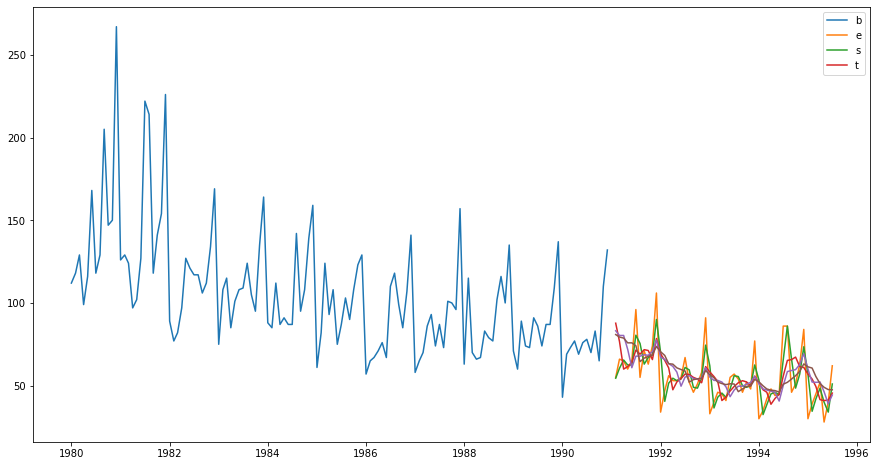

In [68]:
plt.plot(Mov_Avg_train['Rose'],label='Train')
plt.plot(Mov_Avg_test['Rose'],label='Test')
plt.plot(Mov_Avg_test['Traailing2'],label='Trailing2')
plt.plot(Mov_Avg_test['Traailing4'],label='Trailing4')
plt.plot(Mov_Avg_test['Traailing6'],label='Trailing6')
plt.plot(Mov_Avg_test['Traailing8'],label='Trailing8')
plt.legend('best')
plt.plot();

In [69]:
Rmse_MA1=metrics.mean_squared_error(Mov_Avg_test['Rose'],Mov_Avg_test['Traailing2'])
Rmse_MA2=metrics.mean_squared_error(Mov_Avg_test['Rose'],Mov_Avg_test['Traailing4'])
Rmse_MA3=metrics.mean_squared_error(Mov_Avg_test['Rose'],Mov_Avg_test['Traailing6'])
Rmse_MA4=metrics.mean_squared_error(Mov_Avg_test['Rose'],Mov_Avg_test['Traailing8'])

In [70]:
resultdf_MA=pd.DataFrame({'Model':['Rmse_MA1','Rmse_MA2','Rmse_MA3','Rmse_MA4'],'RMSE':[Rmse_MA1,Rmse_MA2,Rmse_MA3,Rmse_MA4]})
resultdf_MA

,Model,RMSE
0,Rmse_MA1,122.407407
1,Rmse_MA2,222.655093
2,Rmse_MA3,232.083333
3,Rmse_MA4,256.494213


In [71]:
resultdf_MA.index=resultdf_MA['Model']

In [72]:
resultdf_MA=resultdf_MA.drop('Model',axis=1)

In [73]:
resultdf_MA.head()

,RMSE
Model,
Rmse_MA1,122.407407
Rmse_MA2,222.655093
Rmse_MA3,232.083333
Rmse_MA4,256.494213


In [74]:
result1_DF=pd.concat([result1_DF,resultdf_MA[resultdf_MA.index=='Rmse_MA1']])

In [75]:
result1_DF

,RMSE
Regression,798.759414
Naive,6161.351852
Avg,2745.337568
Rmse_MA1,122.407407


In [76]:
from statsmodels.tsa.stattools import adfuller

In [77]:
dftest = adfuller(df1,regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -2.433
DF test p-value is 0.36217240393274497
Number of lags used 12


In [78]:
df1['Rose'].diff().dropna()

YearMonth
1980-02-01     6.0
1980-03-01    11.0
1980-04-01   -30.0
1980-05-01    17.0
1980-06-01    52.0
              ... 
1995-03-01     6.0
1995-04-01     7.0
1995-05-01   -24.0
1995-06-01    12.0
1995-07-01    22.0
Name: Rose, Length: 186, dtype: float64

In [79]:
dftest = adfuller(df1['Rose'].diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -8.023
DF test p-value is 6.30526099884067e-11
Number of lags used 12


In [80]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

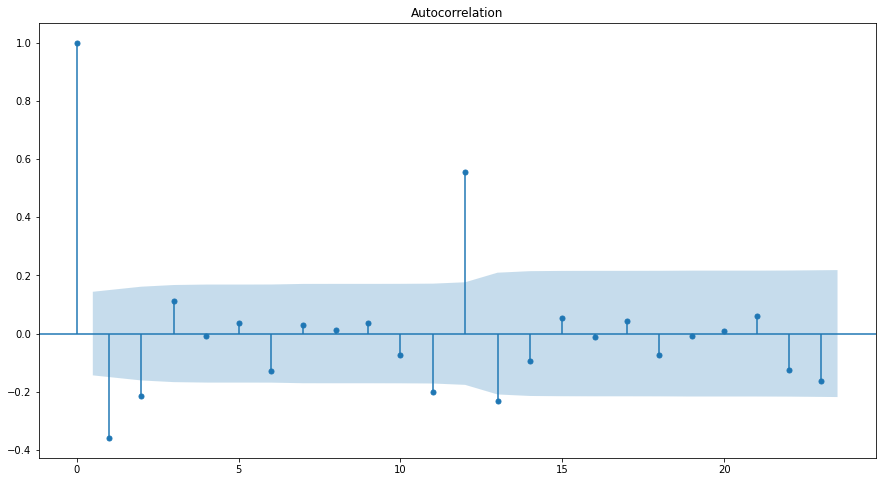

In [81]:
plot_acf(df1['Rose'].diff().dropna(),alpha=0.05);

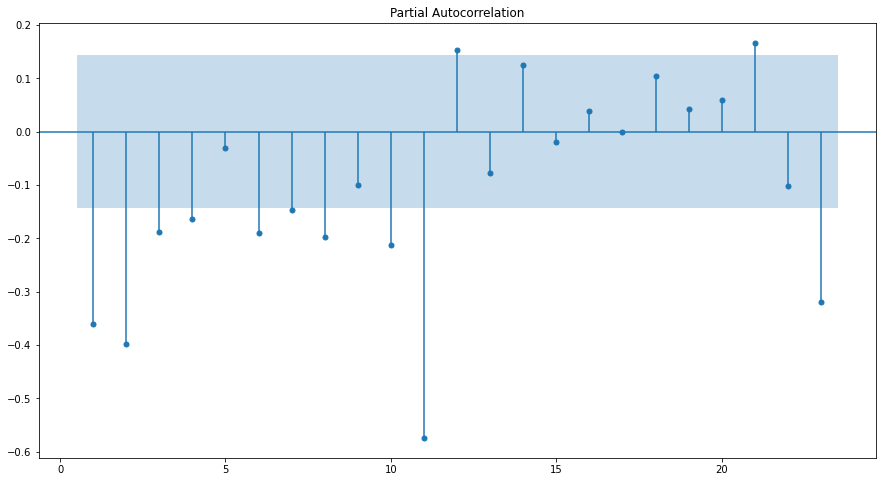

In [82]:
plot_pacf(df1['Rose'].diff().dropna(),zero=False,alpha=0.05);

In [83]:
AR_train=train_df1.copy()
AR_test=test_df1.copy()

In [84]:
dftest = adfuller(AR_train,regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -1.686
DF test p-value is 0.7569093051047064
Number of lags used 13


In [85]:
dftest = adfuller(AR_train['Rose'].diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -6.804
DF test p-value is 3.894831356782412e-08
Number of lags used 12


In [86]:
import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [87]:
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [88]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(AR_train['Rose'].diff().dropna().values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:1453.686409801051
ARIMA(0, 1, 1) - AIC:1330.8642024197125


C:\Users\John\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(0, 1, 2) - AIC:1281.561210267042
ARIMA(1, 1, 0) - AIC:1407.410113685176
ARIMA(1, 1, 1) - AIC:1315.7930865186502
ARIMA(1, 1, 2) - AIC:1278.055799700399
ARIMA(2, 1, 0) - AIC:1364.6902547217119
ARIMA(2, 1, 1) - AIC:1297.8603325328029
ARIMA(2, 1, 2) - AIC:1279.3660395605064


C:\Users\John\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [89]:
ARIMA_AIC.sort_values(by='AIC',ascending=True).head()

,param,AIC
5,"(1, 1, 2)",1278.055800
8,"(2, 1, 2)",1279.366040
2,"(0, 1, 2)",1281.561210
7,"(2, 1, 1)",1297.860333
4,"(1, 1, 1)",1315.793087


In [90]:
auto_ARIMA = ARIMA(AR_train['Rose'], order=(1,1,2))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

C:\Users\John\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\John\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\John\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -635.935
Date:                Sun, 14 Aug 2022   AIC                           1279.871
Time:                        22:17:04   BIC                           1291.372
Sample:                    01-01-1980   HQIC                          1284.544
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4540      0.263     -1.723      0.085      -0.970       0.062
ma.L1         -0.2542      0.242     -1.049      0.294      -0.729       0.221
ma.L2         -0.5983      0.201     -2.970      0.0

C:\Users\John\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


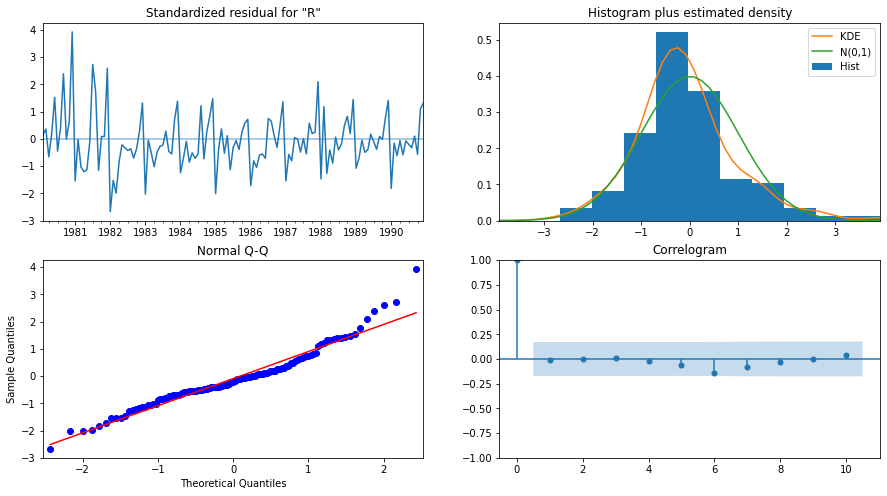

In [91]:
results_auto_ARIMA.plot_diagnostics();

In [92]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(AR_test))

In [93]:
Rmse_AR_auto=metrics.mean_squared_error(AR_test['Rose'],predicted_auto_ARIMA)
Rmse_AR_auto

1300.8083185710088

In [94]:
result1_DF4=pd.DataFrame({'RMSE':[Rmse_AR_auto]},index=['AR_auto'])
result1_DF4

,RMSE
AR_auto,1300.808319


In [95]:
result1_DF=pd.concat([result1_DF,result1_DF4])
result1_DF

,RMSE
Regression,798.759414
Naive,6161.351852
Avg,2745.337568
Rmse_MA1,122.407407
AR_auto,1300.808319


In [96]:
manual_ARIMA = ARIMA(AR_train['Rose'], order=(2,1,4))

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

C:\Users\John\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\John\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\John\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\John\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(2, 1, 4)   Log Likelihood                -632.385
Date:                Sun, 14 Aug 2022   AIC                           1278.771
Time:                        22:17:07   BIC                           1298.897
Sample:                    01-01-1980   HQIC                          1286.949
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0567      0.037    -28.422      0.000      -1.130      -0.984
ar.L2         -0.9734      0.032    -30.308      0.000      -1.036      -0.910
ma.L1          0.3860      0.189      2.038      0.0

C:\Users\John\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [97]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(AR_test))

In [98]:
Rmse_AR_manual=metrics.mean_squared_error(AR_test['Rose'],predicted_manual_ARIMA)
Rmse_AR_manual

1306.4494474010464

In [99]:
result1_DF5=pd.DataFrame({'RMSE':[Rmse_AR_manual]},index=['AR_manual'])
result1_DF5

,RMSE
AR_manual,1306.449447


In [100]:
result1_DF=pd.concat([result1_DF,result1_DF5])
result1_DF

,RMSE
Regression,798.759414
Naive,6161.351852
Avg,2745.337568
Rmse_MA1,122.407407
AR_auto,1300.808319
AR_manual,1306.449447


C:\Users\John\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


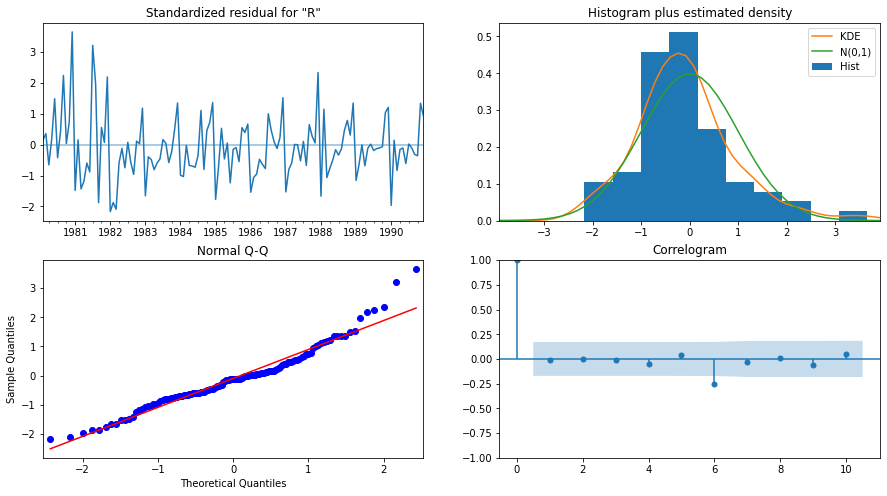

In [125]:
results_manual_ARIMA.plot_diagnostics();

In [101]:
import statsmodels.tools.eval_measures as      em
from   sklearn.metrics                 import  mean_squared_error
from   statsmodels.tsa.api             import ExponentialSmoothing, SimpleExpSmoothing, Holt
from   IPython.display                 import display
from   pylab                           import rcParams

In [102]:
model_SES = SimpleExpSmoothing(train_df1,initialization_method='estimated')

C:\Users\John\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [103]:
model_SES_autofit = model_SES.fit(optimized=True)

In [104]:
model_SES_autofit.params

{'smoothing_level': 0.09874983698117956,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 134.38702481818487,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [105]:
SES_predict = model_SES_autofit.forecast(steps=len(test_df1))
SES_predict

C:\Users\John\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


1991-01-01    87.104997
1991-02-01    87.104997
1991-03-01    87.104997
1991-04-01    87.104997
1991-05-01    87.104997
1991-06-01    87.104997
1991-07-01    87.104997
1991-08-01    87.104997
1991-09-01    87.104997
1991-10-01    87.104997
1991-11-01    87.104997
1991-12-01    87.104997
1992-01-01    87.104997
1992-02-01    87.104997
1992-03-01    87.104997
1992-04-01    87.104997
1992-05-01    87.104997
1992-06-01    87.104997
1992-07-01    87.104997
1992-08-01    87.104997
1992-09-01    87.104997
1992-10-01    87.104997
1992-11-01    87.104997
1992-12-01    87.104997
1993-01-01    87.104997
1993-02-01    87.104997
1993-03-01    87.104997
1993-04-01    87.104997
1993-05-01    87.104997
1993-06-01    87.104997
1993-07-01    87.104997
1993-08-01    87.104997
1993-09-01    87.104997
1993-10-01    87.104997
1993-11-01    87.104997
1993-12-01    87.104997
1994-01-01    87.104997
1994-02-01    87.104997
1994-03-01    87.104997
1994-04-01    87.104997
1994-05-01    87.104997
1994-06-01    87

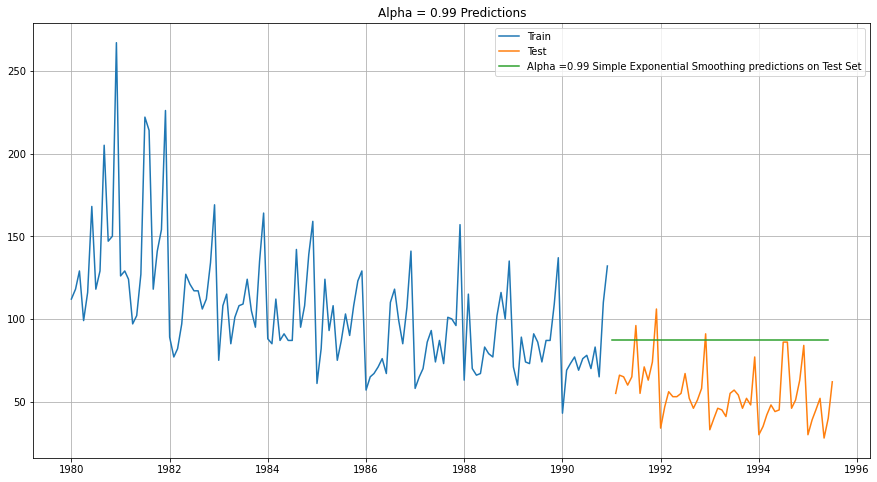

In [106]:
plt.plot(train_df1, label='Train')
plt.plot(test_df1, label='Test')

plt.plot(SES_predict, label='Alpha =0.99 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha = 0.99 Predictions');

In [107]:
print('SES RMSE:',mean_squared_error(test_df1.values,SES_predict.values,squared=False))

SES RMSE: 35.981599341011545


In [108]:
result1_DF7 = pd.DataFrame({'RMSE': [em.rmse(test_df1.values,SES_predict.values)[0]]},index=['EXP1'])
result1_DF7

,RMSE
EXP1,35.981599


In [109]:
result1_DF=pd.concat([result1_DF,result1_DF7])
result1_DF

,RMSE
Regression,798.759414
Naive,6161.351852
Avg,2745.337568
Rmse_MA1,122.407407
AR_auto,1300.808319
AR_manual,1306.449447
EXP1,35.981599


In [110]:
# Initializing the Double Exponential Smoothing Model
model_DES = Holt(train_df1,initialization_method='estimated')
# Fitting the model
model_DES = model_DES.fit()

print('')
print('==Holt model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_DES.params)


==Holt model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 1.4901161193847656e-08, 'smoothing_trend': 1.6610391146660035e-10, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 137.81553690867275, 'initial_trend': -0.4943781897068274, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\John\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [111]:
DES_predict =  model_DES.forecast(len(test_df1))
DES_predict

C:\Users\John\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


1991-01-01    72.063238
1991-02-01    71.568859
1991-03-01    71.074481
1991-04-01    70.580103
1991-05-01    70.085725
1991-06-01    69.591347
1991-07-01    69.096969
1991-08-01    68.602590
1991-09-01    68.108212
1991-10-01    67.613834
1991-11-01    67.119456
1991-12-01    66.625078
1992-01-01    66.130699
1992-02-01    65.636321
1992-03-01    65.141943
1992-04-01    64.647565
1992-05-01    64.153187
1992-06-01    63.658808
1992-07-01    63.164430
1992-08-01    62.670052
1992-09-01    62.175674
1992-10-01    61.681296
1992-11-01    61.186918
1992-12-01    60.692539
1993-01-01    60.198161
1993-02-01    59.703783
1993-03-01    59.209405
1993-04-01    58.715027
1993-05-01    58.220648
1993-06-01    57.726270
1993-07-01    57.231892
1993-08-01    56.737514
1993-09-01    56.243136
1993-10-01    55.748757
1993-11-01    55.254379
1993-12-01    54.760001
1994-01-01    54.265623
1994-02-01    53.771245
1994-03-01    53.276866
1994-04-01    52.782488
1994-05-01    52.288110
1994-06-01    51

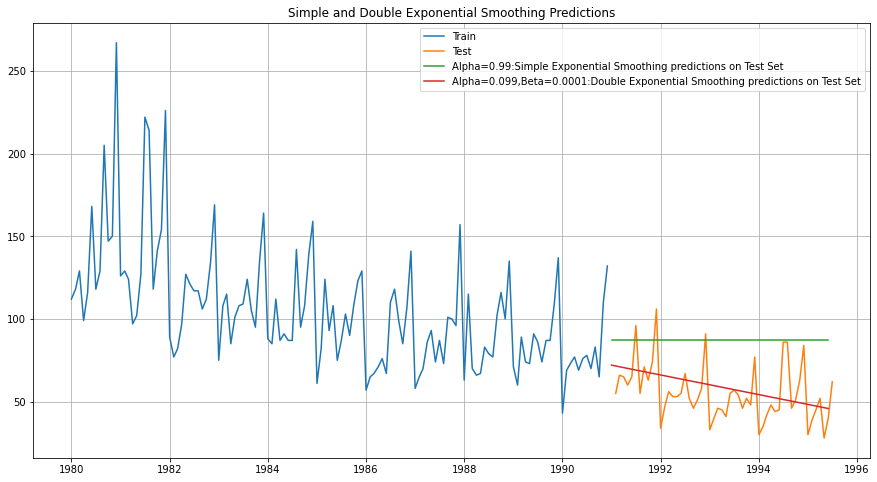

In [112]:
plt.plot(train_df1, label='Train')
plt.plot(test_df1, label='Test')

plt.plot(SES_predict, label='Alpha=0.99:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.099,Beta=0.0001:Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple and Double Exponential Smoothing Predictions');

In [113]:
result1_DF8 = pd.DataFrame({'RMSE': [em.rmse(test_df1.values,DES_predict.values)[0]]},index=['EXP2'])
result1_DF8

,RMSE
EXP2,23.784105


In [114]:
result1_DF=pd.concat([result1_DF,result1_DF8])
result1_DF

,RMSE
Regression,798.759414
Naive,6161.351852
Avg,2745.337568
Rmse_MA1,122.407407
AR_auto,1300.808319
AR_manual,1306.449447
EXP1,35.981599
EXP2,23.784105


In [115]:
model_TES = ExponentialSmoothing(train_df1,trend='additive',seasonal='additive',initialization_method='estimated')
# Fitting the model
model_TES = model_TES.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES.params)


C:\Users\John\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'



==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.08954054664605082, 'smoothing_trend': 0.0002400108693915795, 'smoothing_seasonal': 0.003466872515750747, 'damping_trend': nan, 'initial_level': 146.5570157826235, 'initial_trend': -0.547196983509005, 'initial_seasons': array([-31.17478463, -18.74839869, -10.76961776, -21.36741017,
       -12.63775539,  -7.27430333,   2.61279801,   8.69603625,
         4.79381122,   2.96110122,  21.05738849,  63.18279918]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [116]:
TES_predict =  model_TES.forecast(len(test_df1))
TES_predict

C:\Users\John\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


1991-01-01     42.684928
1991-02-01     54.564005
1991-03-01     61.995209
1991-04-01     50.852018
1991-05-01     59.034271
1991-06-01     63.850901
1991-07-01     73.190805
1991-08-01     78.724624
1991-09-01     74.276280
1991-10-01     71.895000
1991-11-01     89.444365
1991-12-01    131.042724
1992-01-01     36.119272
1992-02-01     47.998349
1992-03-01     55.429553
1992-04-01     44.286362
1992-05-01     52.468615
1992-06-01     57.285245
1992-07-01     66.625149
1992-08-01     72.158968
1992-09-01     67.710624
1992-10-01     65.329344
1992-11-01     82.878709
1992-12-01    124.477068
1993-01-01     29.553616
1993-02-01     41.432693
1993-03-01     48.863898
1993-04-01     37.720706
1993-05-01     45.902959
1993-06-01     50.719589
1993-07-01     60.059493
1993-08-01     65.593312
1993-09-01     61.144968
1993-10-01     58.763688
1993-11-01     76.313053
1993-12-01    117.911412
1994-01-01     22.987961
1994-02-01     34.867037
1994-03-01     42.298242
1994-04-01     31.155050


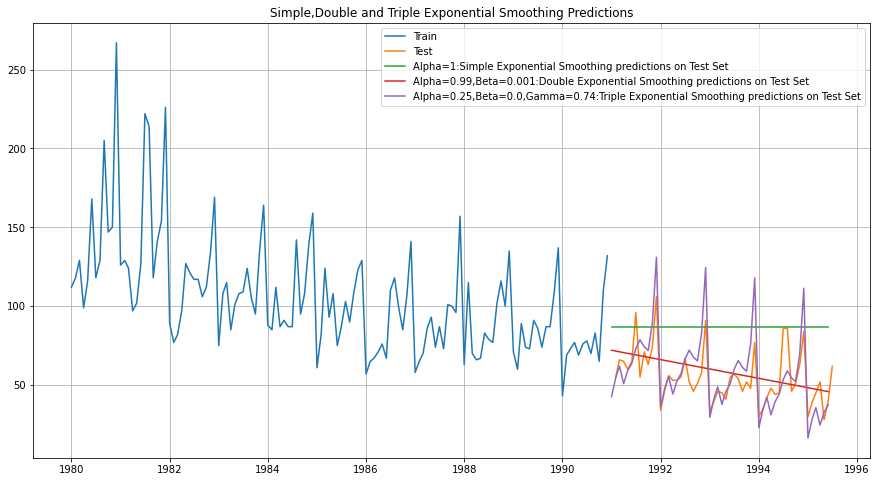

In [117]:
plt.plot(train_df1, label='Train')
plt.plot(test_df1, label='Test')

plt.plot(SES_predict, label='Alpha=1:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.99,Beta=0.001:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict, label='Alpha=0.25,Beta=0.0,Gamma=0.74:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');

In [118]:
result1_DF9 = pd.DataFrame({'RMSE': [em.rmse(test_df1.values,TES_predict.values)[0]]},index=['TES'])
result1_DF9

,RMSE
TES,21.139163


In [119]:
result1_DF=pd.concat([result1_DF,result1_DF9])
result1_DF

,RMSE
Regression,798.759414
Naive,6161.351852
Avg,2745.337568
Rmse_MA1,122.407407
AR_auto,1300.808319
AR_manual,1306.449447
EXP1,35.981599
EXP2,23.784105
TES,21.139163


In [120]:
model_TES_am = ExponentialSmoothing(train_df1,trend='add',seasonal='multiplicative',initialization_method='estimated')
# Fitting the model
model_TES_am = model_TES_am.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES_am.params)

C:\Users\John\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'



==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.0715106306609405, 'smoothing_trend': 0.04529179757535142, 'smoothing_seasonal': 7.244325029450242e-05, 'damping_trend': nan, 'initial_level': 130.40839142502193, 'initial_trend': -0.77985743179386, 'initial_seasons': array([0.86218996, 0.977675  , 1.0687727 , 0.93403881, 1.050625  ,
       1.14410977, 1.25836944, 1.33937772, 1.26778766, 1.24131254,
       1.44724625, 1.99553681]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [121]:
TES_predict_am =  model_TES_am.forecast(len(test_df1))
TES_predict_am

C:\Users\John\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


1991-01-01     56.321655
1991-02-01     63.664690
1991-03-01     69.374024
1991-04-01     60.435528
1991-05-01     67.758341
1991-06-01     73.546478
1991-07-01     80.630117
1991-08-01     85.541323
1991-09-01     80.707713
1991-10-01     78.764555
1991-11-01     91.531230
1991-12-01    125.788433
1992-01-01     54.168902
1992-02-01     61.223492
1992-03-01     66.705377
1992-04-01     58.103246
1992-05-01     65.135026
1992-06-01     70.689855
1992-07-01     77.488188
1992-08-01     82.197159
1992-09-01     77.542202
1992-10-01     75.665128
1992-11-01     87.917577
1992-12-01    120.805914
1993-01-01     52.016149
1993-02-01     58.782294
1993-03-01     64.036730
1993-04-01     55.770964
1993-05-01     62.511711
1993-06-01     67.833232
1993-07-01     74.346259
1993-08-01     78.852995
1993-09-01     74.376691
1993-10-01     72.565700
1993-11-01     84.303925
1993-12-01    115.823395
1994-01-01     49.863396
1994-02-01     56.341097
1994-03-01     61.368082
1994-04-01     53.438682


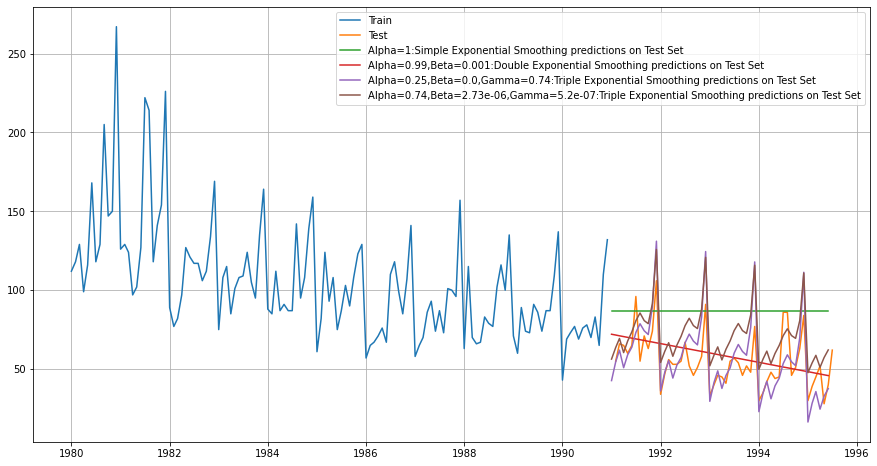

In [122]:
plt.plot(train_df1, label='Train')
plt.plot(test_df1, label='Test')

plt.plot(SES_predict, label='Alpha=1:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.99,Beta=0.001:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict, label='Alpha=0.25,Beta=0.0,Gamma=0.74:Triple Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_am, label='Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()

In [123]:
result1_DF10 = pd.DataFrame({'RMSE': [em.rmse(test_df1.values,TES_predict_am.values)[0]]},index=['TES_am'])
result1_DF10

,RMSE
TES_am,16.951512


In [124]:
result1_DF=pd.concat([result1_DF,result1_DF10])
result1_DF

,RMSE
Regression,798.759414
Naive,6161.351852
Avg,2745.337568
Rmse_MA1,122.407407
AR_auto,1300.808319
AR_manual,1306.449447
EXP1,35.981599
EXP2,23.784105
TES,21.139163
TES_am,16.951512


In [127]:
TES_predict_am_1 =  model_TES_am.forecast(12)
TES_predict_am_1

1991-01-01     56.321655
1991-02-01     63.664690
1991-03-01     69.374024
1991-04-01     60.435528
1991-05-01     67.758341
1991-06-01     73.546478
1991-07-01     80.630117
1991-08-01     85.541323
1991-09-01     80.707713
1991-10-01     78.764555
1991-11-01     91.531230
1991-12-01    125.788433
Freq: MS, dtype: float64

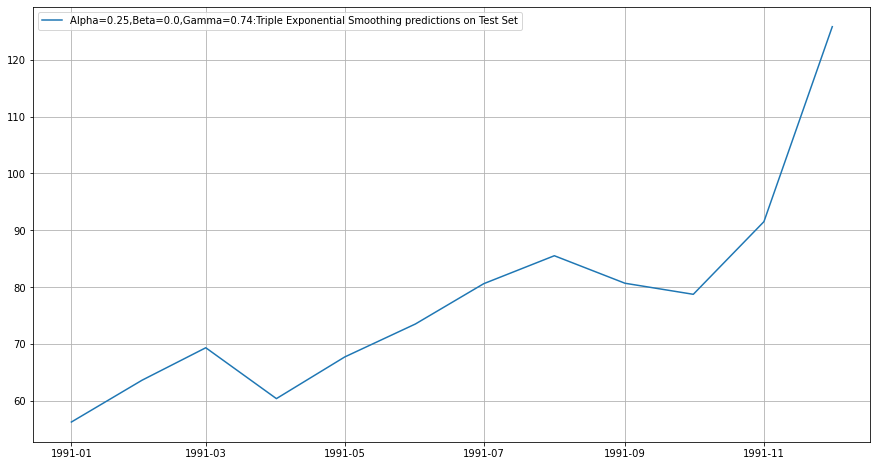

In [128]:
plt.plot(TES_predict_am_1, label='Alpha=0.25,Beta=0.0,Gamma=0.74:Triple Exponential Smoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid()

In [130]:
result1_DF13 = pd.DataFrame({'RMSE': [em.rmse(test_df1.values,TES_predict_am_1.values)[0]]},index=['TES'])
result1_DF13

,RMSE
TES,16.951512
